In [1]:
import numpy as np
import pandas as pd
import requests
from config import api_key
import json
import scipy.stats as sts
from scipy.stats import linregress
from matplotlib import pyplot as plt
from pprint import pprint

In [2]:
file = pd.read_csv('Resources/worldcities.csv')
wholeTable = pd.DataFrame(file)
df = wholeTable[['city','iso2']]
df = df.rename(columns={'iso2': 'country'})
api_key

'0722b8c0f50435fc92ce567f4cae0c78'

In [3]:
nsamples = 1
div = 1000
samples = [df.sample(div) for x in range(0,nsamples)]
type(samples)

list

In [4]:
sample_df = pd.concat(samples)

In [5]:
latitude = []
temp = []
humidity = []
clouds = []
windSpeed = []
longitude = []

samp_url = "http://api.openweathermap.org/data/2.5/weather?q=London&APPID=0722b8c0f50435fc92ce567f4cae0c78"
url = 'http://api.openweathermap.org/data/2.5/weather?q='
#countryCode = 'uk'
#city = 'London'
#url_query = url+city+','+country+"&APPID="+api_key
#url_query
requests.get(samp_url).json()
    

{'coord': {'lon': -0.13, 'lat': 51.51},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 287.32,
  'feels_like': 285.16,
  'temp_min': 285.93,
  'temp_max': 288.71,
  'pressure': 1012,
  'humidity': 82},
 'visibility': 10000,
 'wind': {'speed': 3.6, 'deg': 210},
 'clouds': {'all': 1},
 'dt': 1592523693,
 'sys': {'type': 1,
  'id': 1414,
  'country': 'GB',
  'sunrise': 1592538170,
  'sunset': 1592598063},
 'timezone': 3600,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [6]:
n = 0
city_list = []
for i in range(len(sample_df)):
    city = sample_df['city'].iloc[i]
    country = (sample_df['country'].iloc[i])
    url_query = str(url)+str(city)+','+str(country)+"&units=imperial&APPID="+str(api_key)
    request = requests.get(url_query).json()
    try:
        latitude.append(request['coord']['lat'])
        longitude.append(request['coord']['lon'])
        temp.append(request['main']['temp_max'])
        humidity.append(request['main']['humidity'])
        clouds.append(request['clouds']['all'])
        windSpeed.append(request['wind']['speed'])
        n+=1
        pprint(request['coord']['lat'])
        city_list.append(city)
    except:
        print("Not valid")


43.04
25.89
Not valid
45.64
44.4
Not valid
14.3
41.52
28.96
12.5
-23.86
Not valid
39.11
Not valid
33.92
12.45
39.71
52.47
8.89
-12.14
48.04
41.36
26.16
37.64
29.98
25.01
27.62
Not valid
44.88
Not valid
11.67
Not valid
35.04
-30.94
37.09
41.88
42.96
42.05
Not valid
58.45
44.27
-24.65
14
50.41
41.77
1.5
56.12
-3.72
40.89
41.42
45.1
42.24
41.02
32.37
39.92
29.1
47.08
42.68
41.38
40.36
58.41
25.86
61.6
16.68
39.72
38.65
24.56
53.79
39.73
Not valid
26.22
-20.46
38.91
-20.9
45.04
55.87
14.8
2.78
37.24
-29.41
13.7
68.63
39.17
36.21
38.52
22.82
39.77
12.25
40.63
Not valid
60
-33.14
-2.53
34
38.74
7.5
Not valid
Not valid
35.94
34.14
37.96
33.77
-17.72
41.04
-38.23
Not valid
43.06
42
42.69
40.73
55.05
-7.23
41.91
50.12
Not valid
46.49
41.32
Not valid
38.34
27.98
43.42
42.75
40.77
40
40.82
-18.37
40.9
Not valid
Not valid
-23.97
41.48
33.24
36.03
33.92
46.72
Not valid
42.77
38.53
-9.07
40.77
-29.86
39.72
-38.33
5.87
40.57
-0.72
-7.23
41.77
50.58
37.6
39.6
35.26
50.04
Not valid
5.97
-28.24
48.8
38.

In [7]:
len(temp)
len(latitude)
len(humidity)
len(clouds)
len(windSpeed)

905

In [8]:
#Your second requirement is to run linear regression on each relationship, 
#only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) 
#and Southern Hemisphere (less than 0 degrees latitude):

#Northern Hemisphere - Temperature (F) vs. Latitude
#Southern Hemisphere - Temperature (F) vs. Latitude
#Northern Hemisphere - Humidity (%) vs. Latitude
#Southern Hemisphere - Humidity (%) vs. Latitude
#Northern Hemisphere - Cloudiness (%) vs. Latitude
#Southern Hemisphere - Cloudiness (%) vs. Latitude
#Northern Hemisphere - Wind Speed (mph) vs. Latitude
#Southern Hemisphere - Wind Speed (mph) vs. Latitude

df = pd.DataFrame({'Cities':city_list,'Temperature':temp,"Wind Speed" : windSpeed, "Humidity": humidity, "Clouds":clouds, "Latitude":latitude, 'Longitude':longitude})
df

,Cities,Temperature,Wind Speed,Humidity,Clouds,Latitude,Longitude
0,North Tonawanda,81.00,10.29,44,40,43.04,-78.86
1,Bay Harbor Islands,78.80,8.05,94,1,25.89,-80.13
2,Rhinelander,80.60,5.82,44,20,45.64,-89.41
3,Harrietstown,84.20,3.36,25,1,44.40,-74.16
4,Escuintla,84.20,11.41,83,90,14.30,-90.78
...,...,...,...,...,...,...,...
900,Levittown,79.00,5.82,69,75,40.16,-74.83
901,Fort Polk South,89.60,8.05,46,20,31.05,-93.22
902,Madison,82.00,4.21,51,75,34.73,-86.57
903,Warwick,48.99,5.99,96,21,-28.23,152.02


In [9]:
df.to_csv('Resources/cities.csv', index=False)

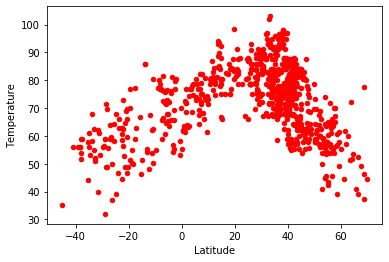

In [39]:
#temp vs latitude
df.plot.scatter(x = 'Latitude', y = 'Temperature', c='red')
plt.savefig('../plots/n1.png')
plt.show()

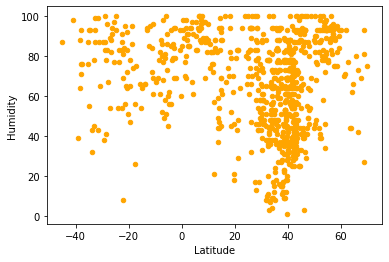

In [38]:
#Humidity vs Latitude
df.plot.scatter(x = 'Latitude', y = 'Humidity', c='orange')
plt.savefig('../plots/n2.png')
plt.show()

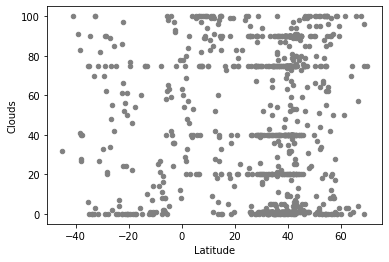

In [37]:
#Cloudiness vs Latitide
df.plot.scatter(x = 'Latitude', y = 'Clouds', c='grey')
plt.savefig('../plots/n3.png')
plt.show()

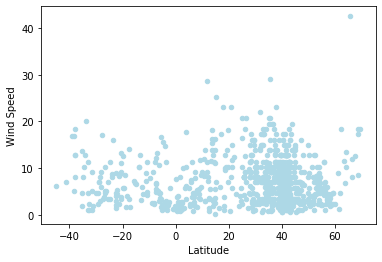

In [36]:
#Wind Speed vs. Latitude
df.plot.scatter(x='Latitude', y='Wind Speed', c='lightBlue')
plt.savefig('../plots/n4.png')
plt.show()

In [14]:
northern_df = df[df['Latitude']>=0]
southern_df = df[df['Latitude']<0]

The r-squared is: 0.15087324125258697


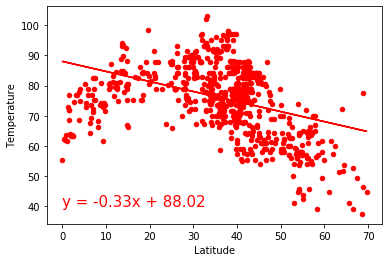

In [35]:
#Northern Hemisphere - Temperature (F) vs. Latitude
latitudes = northern_df['Latitude']
temperature = northern_df['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df['Latitude'],northern_df['Temperature'] )

northern_df.plot.scatter(x = 'Latitude', y = 'Temperature', c='red')



(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudes, temperature)
regressValues = latitudes * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(latitudes,regressValues,"r-")
plt.annotate(line_eq,(0,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print("The r-squared is: "+str(rvalue**2))
plt.savefig('../plots/n5.png')
plt.show()

The r-squared is: 0.27146031769915285


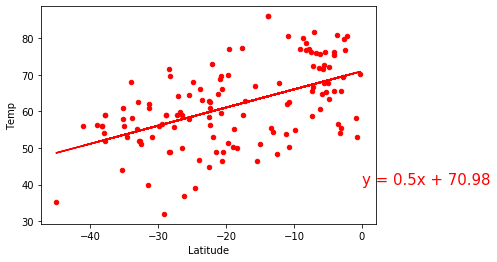

In [34]:
#Southern Hemisphere - Temperature (F) vs. Latitude
latitudes = southern_df['Latitude']
temperatures = southern_df['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df['Latitude'],southern_df['Temperature'] )

southern_df.plot.scatter(x = 'Latitude', y = 'Temperature', c='red')



(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudes, temperatures)
regressValues = latitudes * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(latitudes,regressValues,"r-")
plt.annotate(line_eq,(0,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
print("The r-squared is: "+str(rvalue**2))
plt.savefig('../plots/n6.png')
plt.show()

The r-squared is: 0.007447854808084298


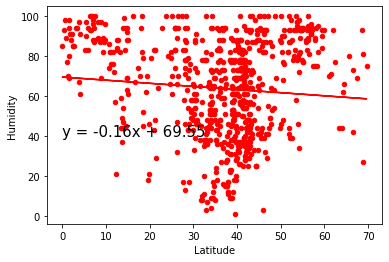

In [33]:
#Northern Hemisphere - Humidity (%) vs. Latitude
latitudes = northern_df['Latitude']
humidity = northern_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df['Latitude'],northern_df['Humidity'] )

northern_df.plot.scatter(x = 'Latitude', y = 'Humidity', c='red')



(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudes, humidity)
regressValues = latitudes * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(latitudes,regressValues,"r-")
plt.annotate(line_eq,(0,40),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print("The r-squared is: "+str(rvalue**2))
plt.savefig('../plots/n7.png')
plt.show()

The r-squared is: 0.0001500933823088112


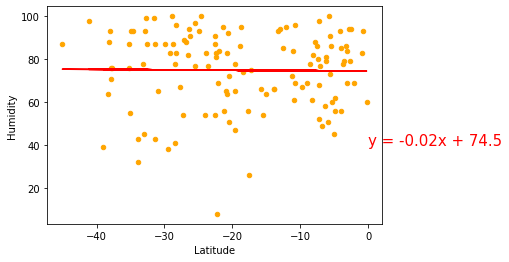

In [32]:
#Southern Hemisphere - Humidity (%) vs. Latitude
latitudes = southern_df['Latitude']
humidity = southern_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df['Latitude'],southern_df['Humidity'] )

southern_df.plot.scatter(x = 'Latitude', y = 'Humidity', c='orange')



(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudes, humidity)
regressValues = latitudes * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(latitudes,regressValues,"r-")
plt.annotate(line_eq,(0,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print("The r-squared is: "+str(rvalue**2))
plt.savefig('../plots/n8.png')
plt.show()

The r-squared is: 0.007340275616226555


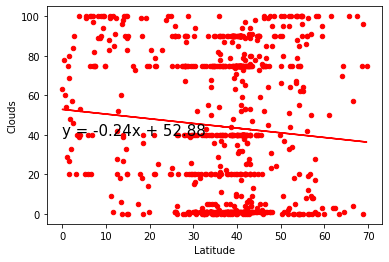

In [31]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude
latitudes = northern_df['Latitude']
clouds = northern_df['Clouds']

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df['Latitude'],northern_df['Clouds'] )

northern_df.plot.scatter(x = 'Latitude', y = 'Clouds', c='red')



(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudes, clouds)
regressValues = latitudes * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(latitudes,regressValues,"r-")
plt.annotate(line_eq,(0,40),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Clouds')
print("The r-squared is: "+str(rvalue**2))
plt.savefig('../plots/n9.png')
plt.show()

The r-squared is: 0.01164709970096699


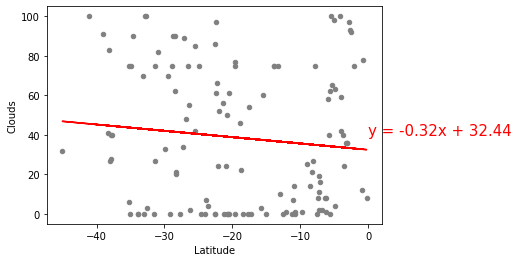

In [30]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude
latitudes = southern_df['Latitude']
clouds = southern_df['Clouds']

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df['Latitude'],southern_df['Clouds'] )

southern_df.plot.scatter(x = 'Latitude', y = 'Clouds', c='grey')



(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudes, clouds)
regressValues = latitudes * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(latitudes,regressValues,"r-")
plt.annotate(line_eq,(0,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Clouds')
print("The r-squared is: "+str(rvalue**2))
plt.savefig('../plots/n10.png')
plt.show()

The r-squared is: 0.00016052721630231508


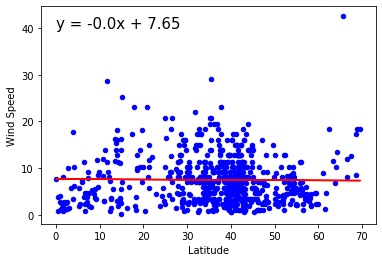

In [28]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude
latitudes = northern_df['Latitude']
winds = northern_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df['Latitude'],northern_df['Wind Speed'] )

northern_df.plot.scatter(x = 'Latitude', y = 'Wind Speed', c='blue')



(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudes, winds)
regressValues = latitudes * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(latitudes,regressValues,"r-")
plt.annotate(line_eq,(0,40),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print("The r-squared is: "+str(rvalue**2))
plt.savefig('../plots/n11.png')
plt.show()

The r-squared is: 0.06248318595430731


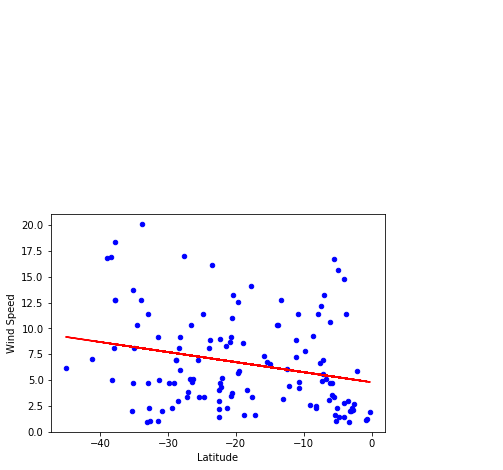

In [27]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude
latitudes = southern_df['Latitude']
wind = southern_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df['Latitude'],southern_df['Wind Speed'] )

southern_df.plot.scatter(x = 'Latitude', y = 'Wind Speed', c='blue')



(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudes, wind)
regressValues = latitudes * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(latitudes,regressValues,"r-")
plt.annotate(line_eq,(0,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print("The r-squared is: "+str(rvalue**2))
plt.savefig('../plots/n12.png')
plt.show()